## Teste Z de duas amostras

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import weightstats

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('Two_Machines.csv')

In [4]:
df

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1
...,...,...
195,152.05,Machine 2
196,151.41,Machine 2
197,153.76,Machine 2
198,150.75,Machine 2


In [5]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


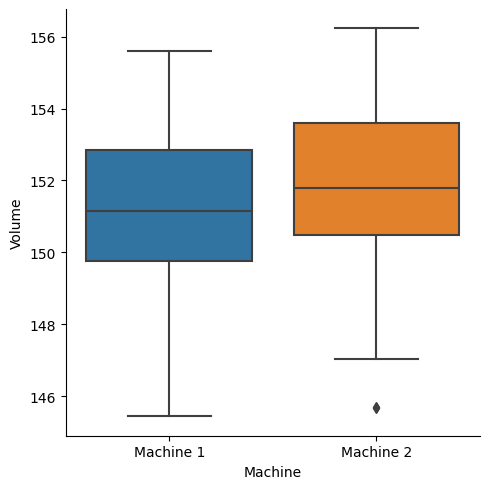

In [6]:
sns.catplot(data=df, x='Machine', y='Volume', kind='box')

Vamos agora fazer o teste Z para as duas máquinas (Teste Z de duas amostras). \
Começamos filtrando os volumes da Máquina 1.

In [7]:
df[df['Machine'] == 'Machine 1']['Volume']

0     154.27
1     150.03
2     151.14
3     145.47
4     149.71
       ...  
95    152.85
96    151.03
97    152.08
98    152.29
99    148.18
Name: Volume, Length: 100, dtype: float64

In [8]:
m1 = df[df['Machine'] == 'Machine 1']['Volume']
m2 = df[df['Machine'] == 'Machine 2']['Volume']

H0: μ1 = μ2 \
Ha: μ1 ≠ μ2

In [9]:
weightstats.ztest(m1,m2)

(-2.189406040190184, 0.028567341032618248)

Como pValue < 0.05, rejeitamos a hipótese nula. Logo, as duas máquinas NÃO estão operando de forma idêntica, ou seja μ1 ≠ μ2.

### Exercício 1 


A biblioteca Seaborn tem vários "built-in" datasets.

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

Vamos usar o dataset tips.

In [11]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Faça um teste de hipótese que verifique se a gorjeta dada por homens e mulheres é a mesma.

Primeiro é necessário verificar se há no mínimo 30 amostras para que seja possível realizar o teste Z.

In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Podemos obter maiores informações sobre o nosso dataset usando a função describe e plotando um gráfico.

In [13]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Vamos plotar um boxplot para observar como as gorjetas estão distribuídas entre homens e mulheres.

/home/aluno/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/aluno/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


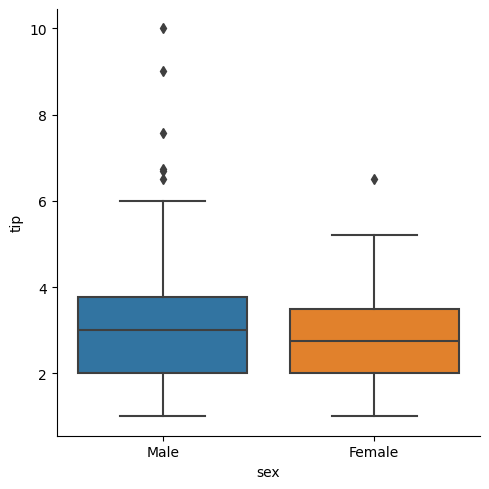

In [14]:
sns.catplot(data=tips, x='sex', y='tip', kind='box')

Para realizar nosso Teste Z, a primeira coisa a fazer é filtrar as gorjetas por sexo.

In [15]:
tm = tips[tips['sex']=='Male']['tip']
tf = tips[tips['sex']=='Female']['tip']

H0: μ(tm) = μ(tf) \
Ha: μ(tm) ≠ μ(tf)

In [16]:
weightstats.ztest(tm, tf)

(1.3878597054212687, 0.1651797698624794)

Como pValue > 0.05, falhamos em rejeitar a hipótese nula. Portanto, a média das gorjetas dadas por homens e mulheres é a mesma.

### Exercício 2: Lunch vs Dinner

Realize um teste de hipótese que verifica se as gorjetas dadas no almoço são iguais às gorjetas dadas no jantar.

H0: μ(tl) = μ(td) \
Ha: μ(tl) ≠ μ(td)

In [17]:
tl = tips[tips['time']=='Lunch']['tip']
td = tips[tips['time']=='Dinner']['tip']

In [18]:
weightstats.ztest(tl, td)

(-1.9062569301202392, 0.05661687925222567)

Como pValue > 0.05, falhamos em rejeitar a hipótese nula. Portanto, as gorjetas tem a mesma média no almoço e no jantar.

/home/aluno/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/aluno/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


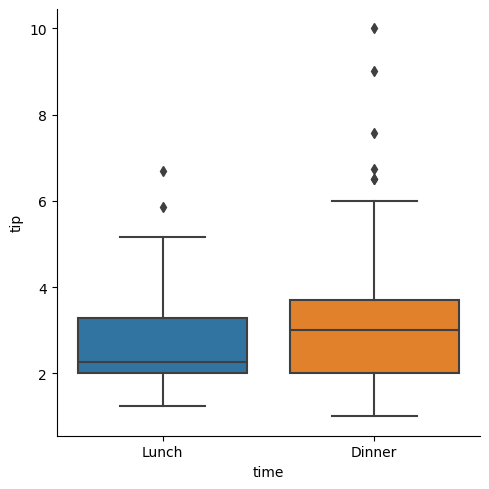

In [19]:
sns.catplot(data=tips, x='time', y='tip', kind='box')

## Teste t de duas amostras

Exemplo 1: Amostras envasadas por duas máquinas apresentam os seguintes volumes: \
Máquina A: 150, 152, 154, 152, 151 \
Máquina B: 156, 155, 158, 155, 154 \
A média é diferente? Calcular com 95% de confiança.

In [20]:
m1 = [150, 152, 154, 152, 151]
m2 = [156, 155, 158, 155, 154]

H0: μ1 = μ2 \
Ha: μ1 ≠ μ2

In [21]:
stats.ttest_ind(m1, m2, equal_var=True)

Ttest_indResult(statistic=-4.005551702879929, pvalue=0.003919295477128331)

Como pValue < 0.05, rejeitamos a hipótese nula. Portanto, as máquinas não estão envasando com a mesma média.

Exemplo 2: Amostras envasadas por duas máquinas têm apresentam os seguintes volumes: \
Máquina A: 150, 152, 154, 152, 151 \
Máquina C: 144, 162, 177, 150, 140 \
A média é diferente? Calcular com 95% de confiança.

H0: μ(m1) = μ(m2) \
Ha: μ(m1) ≠ μ(m2)

In [22]:
m1 = [150, 152, 154, 152, 151]
m3 = [144, 162, 177, 150, 140]

In [23]:
stats.ttest_ind(m1, m3, equal_var=False)

Ttest_indResult(statistic=-0.4146442144313621, pvalue=0.699289145758865)

Como pValue > 0.05, falhamos em rejeitar a hipótese nula. Portanto, as duas máquinas estão produzindo com a mesma média.

## Exercício 3
Utilizando o dataset Titanic, realize um teste de hipótese que verifica se as médias das idades de homens e mulheres que sobreviveram à tragédia do Titanic são iguais. \
Importante: use df.dropna(subset = ['age'], inplace=True) para excluir os registros quem contém NaN na coluna 'age'.

H0: μh = μm \
Ha: μh ≠ μm

In [24]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.dropna(subset = ['age'], inplace=True)

In [26]:
homem_sobrev = df[(df['sex']=='male') & (df['survived']==1)]
mulher_sobrev = df[(df['sex']=='female') & (df['survived']==1)]

In [27]:
weightstats.ztest(homem_sobrev['age'], mulher_sobrev['age'])

(-0.8351170125126802, 0.40365182882615236)

Como pValue > 0.05, falhamos em rejeitar a hipótese nula. Portanto, a média de idade dos sobreviventes é a mesma independentemente do sexo.

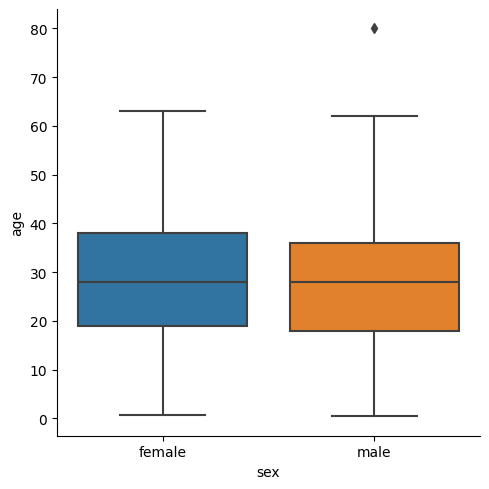

In [28]:
df2 = df[df['survived']==1]

sns.catplot(data=df2, x='sex', y='age', kind='box')